# Clase 19: Integrales múltiples e impropias

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Integrales múltiples

Podemos aplicar las técnicas que hemos visto a la solución de integrales múltiples. Para lograrlo, primero consideremos regiones de integración rectangulares:

$$
\int_a^b dx\,\int_c^d dy\, f(x,y) = \int_a^b dx\,\left(\int_c^d dy\,f(x,y)\right)
$$

Podemos aplicar una de las aproximaciones que hemos visto primero al paréntesis. Vamos a usar el método de Simpson y de cuadratura gaussiana. Para el método de Simpson escribimos

$$
\int_a^b dx\,\int_c^d dy\, f(x,y) \approx \int_a^b \frac{k}{3}\left[f(x,y_o) + 2\sum_{j = 1}^{(m/2)-1}f(x, y_{2j}) + 4\sum_{j = 1}^{m/2}f(x, y_{2j-1}) + f(x, y_m)\right]
$$

donde $y_j = c + jk$ y $k = (c - d)/m$, donde $m$ es el número de subintervalos en esta dimensión. Ahora consideramos cada uno de estos términos como una integral en $x$ y aplicarle la regla de Simpson nuevamente, obteniendo una expresión algo complicada

$$
\begin{aligned}
\int_a^b dx\,\int_c^d dy\, f(x,y) &\approx \frac{hk}{9}\Bigg\{\left[f(x_o,y_o) + 2\sum_{j = 1}^{(m/2)-1}f(x_o, y_{2j}) + 4\sum_{j = 1}^{m/2}f(x_o, y_{2j-1}) + f(x_o, y_m)\right] \\
&\phantom{\approx}+ 2\sum_{i=1}^{(m/2)-1}\left[f(x_{2i},y_o) + 2\sum_{j = 1}^{(m/2)-1}f(x_{2i}, y_{2j}) + 4\sum_{j = 1}^{m/2}f(x_{2i}, y_{2j-1}) + f(x_{2i}, y_m)\right] \\
&\phantom{\approx}+ 4\sum_{i=1}^{(m/2)}\left[f(x_{2i-1},y_o) + 2\sum_{j = 1}^{(m/2)-1}f(x_{2i-1}, y_{2j}) + 4\sum_{j = 1}^{m/2}f(x_{2i-1}, y_{2j-1}) + f(x_{2i-1}, y_m)\right] \\
&\phantom{\approx}+ \left[f(x_n,y_o) + 2\sum_{j = 1}^{(m/2)-1}f(x_n, y_{2j}) + 4\sum_{j = 1}^{m/2}f(x_n, y_{2j-1}) + f(x_n, y_m)\right]
\Bigg\}
\end{aligned}
$$

In [5]:
def simpson2(f, a, b, c, d, n, m):
    
    h = (b-a)/n
    k = (d-c)/m
    
    borde_x = 0
    suma_x_par = 0
    suma_x_impar = 0
    for i in range(n+1):
        x = a + i*h
        borde_y = f(x, c) + f(x, d)
        suma_y_par = sum(f(x, c + j*k) for j in range(2, m, 2))
        suma_y_impar = sum(f(x, c + j*k) for j in range(1, m, 2))
        simpson_y = borde_y + 2*suma_y_par + 4*suma_y_impar
        if i == 0 or i == n:
            borde_x += simpson_y
        elif i%2 == 0:
            suma_x_par += simpson_y
        else:
            suma_x_impar += simpson_y
    
    resultado = borde_x + 2*suma_x_par + 4*suma_x_impar
    
    return h*k*resultado/9

In [6]:
def f(x, y):
    return np.cos(x)*np.cos(y)

In [7]:
simpson2(f, 0, 1, 0, 1, 10, 10)

0.7080742059596224

In [8]:
np.sin(1)**2

0.7080734182735712

La fórmula de error es algo compleja de estimar, pero si la función tiene cuartas derivadas continuas el resultado es

$$
-\frac{(d-c)(b-a)}{180}\left[h^4 \frac{\partial^4 f}{\partial x^4}(\eta, \mu) + k^4\frac{\partial^4 f}{\partial y^4}(\eta, \mu)\right]
$$

donde $(\eta, \mu)$ es algún punto en la región de integración.

Pero en general la región de integración no es rectangular. En estos casos escribimos

$$
\int_a^b dx\,\int_{c(x)}^{d(x)}dy\,f(x,y)
$$

De esta forma, basta evaluar la función $f$ en estas funciones de los bordes $c(x)$ y $d(x)$. Mejoremos entonces el código anterior.

In [9]:
def simpson2(f, a, b, c, d, n, m):
    
    h = (b-a)/n
    
    borde_x = 0
    suma_x_par = 0
    suma_x_impar = 0
    for i in range(n+1):
        x = a + i*h
        c1 = c(x)
        d1 = d(x)
        k = (d1 - c1)/m
        borde_y = (f(x, c1) + f(x, d1))
        suma_y_par = sum(f(x, c1 + j*k) for j in range(2, m, 2))
        suma_y_impar = sum(f(x, c1 + j*k) for j in range(1, m, 2))
        simpson_y = k*(borde_y + 2*suma_y_par + 4*suma_y_impar)
        if i == 0 or i == n:
            borde_x += simpson_y
        elif i%2 == 0:
            suma_x_par += simpson_y
        else:
            suma_x_impar += simpson_y
    
    resultado = borde_x + 2*suma_x_par + 4*suma_x_impar
    
    return h*resultado/9

Se puede hacer lo mismo con la cuadratura gaussiana (esta versión además tiene menos operaciones que la cuadratura gaussiana hecha como lo habíamos programado la clase pasada):

In [10]:
def gauss_quad_5_2d(f, a, b, c, d):
    
    cg = [0.2369268850, 0.4786286705, 0.5688888889, 0.4786286705, 0.2369268850]
    rg = [0.9061798459, 0.5384693101, 0.0000000000, -0.5384693101, -0.9061798459]
    
    h1 = (b - a)/2
    h2 = (a + b)/2
    result = 0

    for i in range(5):
        
        x = h1*rg[i] + h2
        c1 = c(x)
        d1 = d(x)
        k1 = (d1 - c1)/2
        k2 = (d1 + c1)/2
        result += cg[i]*k1*sum(cg[j]*f(x, k1*rg[j] + k2) for j in range(5))
    
    return h1*result

In [11]:
def f(x, y):
    return np.exp(y/x)

In [12]:
simpson2(f, 0.1, 0.5, lambda x: x**3, lambda x: x**2, 10, 10)

0.033305461281902184

In [13]:
gauss_quad_5_2d(f, 0.1, 0.5, lambda x: x**3, lambda x: x**2)

0.033305566114962486

La integral analítica es:

$$
\int dx\,\int_{x^3}^{x^2}dy\,e^{y/x} = -\frac{1}{2}e^{x^2} + e^x(-1+x)
$$

In [14]:
def exacta(x):
    return -(1/2)*np.exp(x**2) + np.exp(x)*(-1+x)

exacta(0.5) - exacta(0.1)

0.033305566116232255

Con menos evaluaciones, la cuadratura gaussiana resulta ser más precisa. También se puede hacer algo análogo en más dimensiones, donde el número reducido de evaluaciones de la cuadratura gaussiana es una ventaja todavía mayor ya que el número de evaluaciones crece como $\mathcal{O}(n^d)$ donde $d$ es la dimensión de la integral.

## Integrales impropias

Ahora discutiremos cómo tratar integrales indefinidas. Es decir, trataremos integrales cuyo integrando tiene una divergencia en uno de los dos extremos de integración o tal que uno de los límites de integración está en el infinito.

Para empezar, consideremos una integral de la forma

$$
\int_a^b dx\,\frac{g(x)}{(x - a)^p}
$$

Este tipo de integrales converge si $p < 1$. Pero cuando $1 < p < 0$ tendremos una división por cero cuando queremos evaluar la integral en el extremo $x = a$ lo que dará un error.

Por ejemplo intentemos encontrar la siguiente integral

$$
\int_0^1 dx\,\frac{x - 1}{\sqrt{x}} = -\frac{4}{3}
$$

In [15]:
-4/3

-1.3333333333333333

In [16]:
def trapecio(f, a, b, n):
    h = (b - a)/n
    fx = f(np.linspace(a+h, b-h, n-1, endpoint=True))
    return (h/2)*(f(a) + 2*sum(fx) + f(b))

In [17]:
def f(x):
    return (x-1)/np.sqrt(x)

trapecio(f, 0, 1, 10)

/Users/jorgenorena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


-inf

O da resultados con un error grande

In [18]:
def gauss_quad_5(f, a, b):
    
    def x(t):
        return ((b - a)*t + a + b)/2
    
    c = [0.2369268850, 0.4786286705, 0.5688888889, 0.4786286705, 0.2369268850]
    r = [0.9061798459, 0.5384693101, 0.0000000000, -0.5384693101, -0.9061798459]
    
    return ((b-a)/2)*sum(c[i]*f(x(r[i])) for i in range(5))

In [19]:
gauss_quad_5(f, 0, 1)

-1.1743030904176726

Para mejorar esto, podemos aislar la divergencia aproximando la función cerca de la divergencia con un polinomio de Taylor cerca de la divergencia:

$$
g(x) \approx P_m(x) = \sum_{n=0}^m \frac{1}{n!}(x - a)^n \frac{d^ng}{dx^n}(a)
$$

El polinomio de Taylor se puede integrar directamente

$$
\int_a^b dx\,\frac{P_m(x)}{(x -a)^p} = \sum_{n=0}^m \frac{1}{(n - p + 1)n!}(b - a)^{(n - p + 1)} \frac{d^ng}{dx^n}(a)
$$

y para la integral completa escribimos

$$
\int_a^b dx\,\frac{g(x)}{(x -a)^p} = \int_a^b dx\,\frac{g(x) - P_m(x)}{(x-a)^p} +  \sum_{n=0}^4 \frac{1}{(n - p + 1)n!}(b - a)^{(n - p + 1)} \frac{d^ng}{dx^n}(a)
$$

Además podemos definir que el integrando de la primera integral sea $0$ cuando $x = a$. Esto nos dará una función continua ya que $\lim_{x\rightarrow a} \frac{g(x) - P_m(x)}{(x-a)^p} = 0$ para $m > 0$.

Para nuestro ejemplo el polinomio de Taylor es la función misma, así que la integral nos da directamente el resultado analítico. Integramos en cambio la siguiente función

$$
\int_0^1 dx\,\frac{e^x}{\sqrt{x}}
$$

La $n$-ésima derivada es fácil de calcular

$$
\frac{d^n e^x}{dx^n} = e^x
$$

In [20]:
poly = sum(1/((n + 0.5)*np.math.factorial(n)) for n in range(5))

def fp(x):
    if x == 0:
        return 0
    pol = sum(1/(np.math.factorial(n))*x**n for n in range(5))
    return (np.exp(x) - pol)/np.sqrt(x)

gauss_quad_5(fp, 0, 1) + poly

2.9253034921633922

In [21]:
def f(x):
    return np.exp(x)/np.sqrt(x)
    
gauss_quad_5(f, 0, 1)

2.7675249220255154

A veces no es práctico calcular los polinomios de Taylor, en estos casos debemos recurrir a las derivadas numéricas, que sin embargo son inestables. Una alternativa es introducir un corte a la integral pero se pierde control sobre la precisión

In [110]:
def punto_medio(f, a, b, n):
    h = (b-a)/n
    fx = f(np.linspace(a + h/2, b - h/2, n, endpoint=True))
    return h*sum(fx)

Text(0, 0.5, 'Resultado')

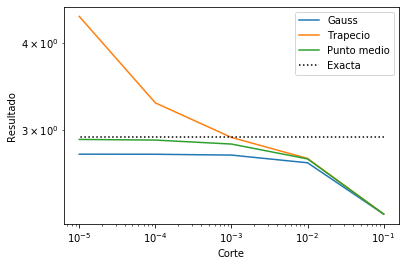

In [121]:
def f(x):
    return np.exp(x)/np.sqrt(x)

cut = [10**(-n) for n in range(1,6)]
results_gauss = [gauss_quad_5(f, c, 1) for c in cut]
results_trap = [trapecio(f, c, 1, 100) for c in cut]
results_mid = [punto_medio(f, c, 1, 1000) for c in cut] # vary number of evals
plt.loglog(cut, np.abs(results_gauss), label='Gauss')
plt.loglog(cut, np.abs(results_trap), label='Trapecio')
plt.loglog(cut, np.abs(results_mid), label='Punto medio')
plt.loglog(cut, np.full(len(cut), gauss_quad_5(fp, 0, 1) + poly), color='black', linestyle=':', label='Exacta')
plt.legend()
plt.xlabel('Corte')
plt.ylabel('Resultado')

Text(0, 0.5, 'Resultado')

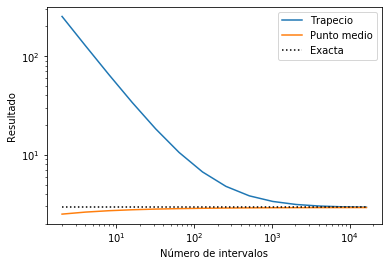

In [123]:
def f(x):
    return np.exp(x)/np.sqrt(x)

num = [2**(n) for n in np.arange(1,15)]
results_trap = [trapecio(f, 1e-6, 1, c) for c in num]
results_mid = [punto_medio(f, 1e-6, 1, c) for c in num]
plt.loglog(num, np.abs(results_trap), label = 'Trapecio')
plt.loglog(num, np.abs(results_mid), label = 'Punto medio')
plt.loglog(num, np.full(len(num), gauss_quad_5(fp, 0, 1) + poly), color='black', linestyle=':', label='Exacta')
plt.legend()
plt.xlabel('Número de intervalos')
plt.ylabel('Resultado')

En la práctica se usan algoritmos adaptativos que por su propia naturaleza incrementarán el número de evaluaciones cerca de la divergencia. Como se necesitarían demasiadas evaluaciones, se usan algoritmos de "aceleración" cerca de los puntos deivergentes.

Para integrales con la divergencia en el otro extremo de integración se trata el problema de forma completamente análoga. 

Para integrales indefinidas podemos hacer un cambio de variable

$$
\int_a^{\infty}dx\,f(x) = \int_{0}^{1/a}dy\,\frac{f(1/y)}{y^2}
$$

Esta integral converge si $f(1/y) \approx y^p$ cuando $y$ se acerca a $0$, para $p > 1$.

## Tareas

### Tarea 10.1

Calcule las siguientes integrales

$$
\int_1^\infty dx\,\frac{\log(x)x^{1/2}}{(x^2 + 3)}
$$

$$
\int_1^\infty dx\,\ln(x)\ \sin(x)
$$

**Pista:** Al aislar la divergencia, escriba $\log(x)f(x)/x^p$, luego expanda en Taylor $f(x)$ y las integrales resultantes con integrandos del tipo $x^n \log(x)$ tienen solución analítica.

**Solución:** La segunda de estas integrales diverge

La primera se puede resolver haciendo $y = 1/x$ tal que queda

$$
-\int_0^1 dy\, \frac{\log(y)}{y^{1/2}(1 + 3y^2)}
$$

Podemos aislar la divergencia escribiendo

$$
\frac{\log(y)}{1+ 3y^2} \approx \log(y)\left(1 - 3 y^2 + 9 y^4\right)
$$

Las siguientes integrales resultan útiles

$$
\int_0^1 dy\,\frac{\log(y)}{\sqrt{y}} = \left[2\sqrt{y}(-2 + \log(y))\right]_0^1 = -4
$$

$$
\int_0^1 dy\,y^{3/2}\log(y) = \left[\frac{2}{25} y^{5/2} (-2 + 5 \log(y))\right]_0^1 = -\frac{4}{25}
$$

$$
\int_0^1 dy\,y^{7/2}\log(y) = \left[\frac{2}{81} y^{9/2} (-2 + 9 \log(y))\right]_0^1 = -\frac{4}{49}
$$

tal que 

$$
-\int_0^1 dy\,\frac{\log(y)}{1+ 3y^2} \approx \frac{892}{225}
$$

el resto de la integral lo calculamos numéricamente

In [39]:
class MaxIterations(Exception):
    pass

def adaptive(f, a, b, tol, N=100000):
    
    # Variables iniciales
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]
    
        
    
    while i >= 0:
        
        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]
        
        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")
            
            # Intervalo derecho
            i += 1
            if i >= len(ai): # A veces hay que ampliar la lista
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1
                
            # Intervalo izquierdo
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]
                
    return approx

In [168]:
div = 892/225

def g(x):
    if x == 0:
        return 0
    return -np.log(x)*(1/(1 + 3*x**2) - 1 + 3*x**2 - 9*x**4)/np.sqrt(x)

div + adaptive(g, 0, 1, 0.0001)

3.718751903286865

Si lo hacemos sin sustraer la divergencia necesitamos un corte muy cercano a cero:

In [179]:
def f(y):
    return -np.log(y)/(y**(1/2)*(1+3*y**2))

adaptive(f, 0.00000000000001, 1, 0.0001)

3.718717957641366

### Tarea 10.2

Escriba un código que calcule integrales triples usando una cuadratura gaussiana, y úselo para calcular en coordenadas cartesianas la carga total al interior de una esfara con densidad $\rho = r$ con $r \leq 1$. Compare su resultado con el valor exacto.

In [86]:
def gauss_quad_5_3d(f, a, b, c, d, e, g):
    
    cg = [0.2369268850, 0.4786286705, 0.5688888889, 0.4786286705, 0.2369268850]
    rg = [0.9061798459, 0.5384693101, 0.0000000000, -0.5384693101, -0.9061798459]
    
    h1 = (b - a)/2
    h2 = (a + b)/2
    result = 0

    for i in range(5):
        
        x = h1*rg[i] + h2
        cx = c(x)
        dx = d(x)
        k1 = (dx - cx)/2
        k2 = (dx + cx)/2
        resulti = 0
        for j in range(5):
            y = k1*rg[j] + k2
            exy = e(x,y)
            gxy = g(x,y)
            l1 = (gxy - exy)/2
            l2 = (gxy + exy)/2
            resulti += cg[j]*l1*sum(cg[k]*f(x, y, l1*rg[k] + l2) for k in range(5))
        result += cg[i]*k1*resulti
    
    return h1*result

In [96]:
def rho(x, y, z):
    #return 1
    return np.sqrt(x*x + y*y + z*z)

def rxy(x, y):
    #return 1
    return np.sqrt(1 - x*x - y*y)

def mrxy(x, y):
    #return -1
    return -rxy(x, y)

def rx(x):
    #return 1
    return np.sqrt(1 - x*x)

def mrx(x):
    #return -1
    return -np.sqrt(1 - x*x)

In [97]:
gauss_quad_5_3d(rho, -1, 1, mrx, rx, mrxy, rxy)

3.1263476726802177

El resultado exacto es $\pi$. Al aumentar las dimensiones es mucho más difícil lograr una buena precisión. En este caso se hicieron del orden de 100 evaluaciones y la precisión es sólo del orden de $10^{-2}$.

In [98]:
np.pi

3.141592653589793

### Tarea 10.3

Use un método numérico para calcular la siguiente integral

$$
\int_0^\infty dx\,\frac{\log(x)}{\sqrt{x + 5x^3}}
$$

**Pista:** Al aislar la divergencia, escriba $\log(x)f(x)/x^p$, luego expanda en Taylor $f(x)$ y las integrales resultantes con integrandos del tipo $x^n \log(x)$ tienen solución analítica.

**Solución:** En este caso tenemos divergencias en ambos extremos. Es conveniente partir la integral en dos pedazos

$$
\int_0^1 dx\,\frac{\log(x)}{\sqrt{x + 5x^3}} + \int_1^\infty dx\,\frac{\log(x)}{\sqrt{x + 5x^3}}
$$

La segunda integral es indefinida y hacemos el cambio de variables $y = 1/x$ para obtener

$$
-\int_0^1 dy\,\frac{\log(y)}{y^{1/2}\sqrt{y^2 + 5}}
$$

Esta integral es similar a la hecha en la tarea 10.1. Expandimos en Taylor

$$
\frac{1}{\sqrt{y^2 + 5}} \approx \frac{1}{\sqrt{5}} - \frac{y^2}{10\sqrt{5}} + 3\frac{y^4}{200\sqrt{5}}
$$

y se pueden usar las mismas integrales de la tarea 10.1 para obtener

$$
-\int_0^1 dy\,\frac{\log(y)}{y^{1/2}\sqrt{y^2 + 5}} \approx \frac{26897}{6750\sqrt{5}}
$$

El resto de la integral se calcula numéricamente

In [136]:
div1 = 26897/(6750*np.sqrt(5))
def g(y):
    if y == 0:
        return 0
    return -np.log(y)/np.sqrt(y)*(1/(np.sqrt(y**2 + 5)) - 1/np.sqrt(5) \
                                + y*y/(10*np.sqrt(5)) - 3*y**4/(200*np.sqrt(5)))
int1 = adaptive(g, 0, 1, 0.00001) + div1

In [137]:
int1

1.7820071860143234

Para la primera integral también tenemos que aislar una divergencia, tenemos que

$$
\frac{1}{\sqrt{1 + 5x^2}} \approx 1 - \frac{5x^2}{2}+\frac{75 x^4}{8}
$$

y usando las mismas integrales de la tarea 10.1 obtenemos

$$
\int_0^1 dx\,\frac{\log(x)}{\sqrt{x + 5x^3}} \approx -\frac{1097}{270}
$$

El resto de la integral se calcula numéricamente

In [138]:
div2 = -1097/270
def g(x):
    if x == 0:
        return 0
    return np.log(x)/np.sqrt(x)*(1/np.sqrt(1+5*x**2) - 1 + 5*x*x/2 - 75*x**4/8)
int2 = adaptive(g, 0, 1, 0.00001) + div2

In [139]:
int2

-3.7775402379289784

In [140]:
int1 + int2

-1.995533051914655

### Tarea 10.4

Calcule la siguiente integral

$$
\int_1^\infty dx\,\int_1^\infty dy\, \frac{\tan^{-1}(xy)}{y^2 (x^{3/2}+1)}
$$

**Pista:** La $\tan^{-1}(x)$ tiende a una constante cuando $x \rightarrow \infty$ tal que al aislar la divergencia, se puede reemplazar por la constante.

**Solución:** Siguiendo la filosofía de las integrales múltiples, nos ocupamos primero de la integral en $y$ para $x$ fijo. Necesitamos hacer un cambio de variable $z = 1/y$ para obtener

$$
\int_0^1 dz \frac{\tan^{-1}(x/z)}{(x^{3/2} + 1)}
$$

Esta integral se puede evaluar numéricamente sin mayores problemas. La única sutileza es que hay una evaluación indeterminada cuando $z = 0$, pero podemos reemplazar el valor de la tangente inversa por su límite en el infinito $\lim_{z \rightarrow 0} \tan^{-1}(x/z) = \pi/2$.

Para la integral en $x$ hacemos el cambio de variables $w = 1/x$ y obtenemos

$$
\int_0^1 dw \int_0^1 dz \frac{\tan^{-1}(1/wz)}{w^{1/2} (w^{3/2} + 1)}
$$

Aquí necesitamos aislar una divergencia. Primero usamos el hecho que $\lim_{w \rightarrow 0} \tan^{-1}(1/wz) = \pi/2$ y además cerca de la divergencia

$$
\frac{1}{(w^{3/2} + 1)} \approx 1 - w^{3/2} + w^3
$$

Entonces cerca de la divergencia 

$$
\int_0^1 dw \int_0^1 dz \frac{\tan^{-1}(1/wz)}{w^{1/2} (w^{3/2} + 1)} \approx \int_0^1 dw \frac{\pi/2}{w^{1/2}}(1 - w^{3/2} + w^3) = \frac{25\pi}{28}
$$

El resto de la integral se calcula numéricamente

In [166]:
div = 25*np.pi/28
def g(w,z):
    if w == 0:
        return 0
    elif z == 0:
        return np.pi/2/w**(0.5)*(1/(w**(1.5) + 1) - 1 + w**(1.5) - w**3)
    else:
        return 1/w**(0.5)*(np.arctan(1/(w*z))/(w**(1.5) + 1) - np.pi/2*(1 - w**(1.5) + w**3))

def uno(w):
    return 1

def cero(w):
    return 0
    
gauss_quad_5_2d(g, 0, 1, cero, uno) + div

2.4056457798829656

### Tarea 10.5

Use una cuadratura gaussiana para calcular el volumen entre el plano $z = 0$ y la superficie dada por el hiperboloide $x^2 + y^2 - z^2 = -9$ para la región dada por $x^2 + 3y^2 \leq 1$.

In [182]:
def z(x,y):
    return np.sqrt(x**2 + y**2 + 9)

def y_borde_sup(x):
    return np.sqrt((1 - x**2)/3)

def y_borde_inf(x):
    return -np.sqrt((1 - x**2)/3)

gauss_quad_5_2d(z, -1, 1, y_borde_inf, y_borde_sup)

5.559570138284819